In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
clean_data=pd.read_csv("data_cleaned.csv", sep="," )

/Users/david.bellaiche/.pyenv/versions/3.7.5/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
clean_data.describe()

nutriscore_score    energy_100g       fat_100g  saturated-fat_100g  \
count     206102.000000  206102.000000  206102.000000       206102.000000   
mean           9.471999    1147.628111      15.374194            5.862102   
std            8.768015     782.256715      18.356567            7.971046   
min          -15.000000       0.000000       0.000000            0.000000   
25%            2.000000     490.000000       1.500000            0.322250   
50%           10.000000    1050.000000       9.200000            2.400000   
75%           16.000000    1657.000000      24.000000            8.900000   
max           40.000000    3766.000000     100.000000           60.000000   

       carbohydrates_100g    sugars_100g  proteins_100g      salt_100g  \
count       206102.000000  206102.000000  206102.000000  206102.000000   
mean            24.042629      12.188465       8.783777       0.957874   
std             25.835600      17.919997       8.350985       1.410556   
min              0.000000       0.000000       0.000000       0.000000   
25%              2.000000       0.600000       2.000000       0.090000   
50%             12.000000       3.100000       6.400000       0.600000   
75%             47.000000      16.000000      13.000000       1.300000   
max             99.000000      98.000000      61.000000      18.000000   

         sodium_100g  unsaturated-fat_100g  
count  206102.000000         206102.000000  
mean        0.383161              9.512092  
std         0.564257             13.940647  
min         0.000000              0.000000  
25%         0.036000              0.900000  
50%         0.240000              5.200000  
75%         0.520000             12.000000  
max         7.200000            100.000000

# Analyse univariée

In [4]:
def univariate_analysis(df=clean_data, indicator="nutriscore_score", whisker=1.5):
    fig, ax = plt.subplots(2, figsize=(12, 9))
    plt.title(indicator)
    sns.distplot(df[indicator], bins=30, ax=ax[0])
    sns.boxplot(df[indicator], ax=ax[1], whis=whisker)
    ax[0].set_title((indicator, " histogram"))
    ax[1].set_title((indicator, " box plot"))
    plt.subplots_adjust(hspace=0.4)
    plt.show()
    print(df[indicator].describe())
    print(" Skewness empirique: ", df[indicator].skew())
    #learniing: difference avec matpllotlib, le param ax est dans la fonction plot (plutot que ax[0]=... puis plt.show())

### Let's take our key indicators and perform 3 univariate analysis: 
- proteins_100g
- energy_100g
- nutriscore_score

In [5]:
univar_indicator=["proteins_100g", "energy_100g", "nutriscore_score"]

/Users/david.bellaiche/.pyenv/versions/3.7.5/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/david.bellaiche/.pyenv/versions/3.7.5/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


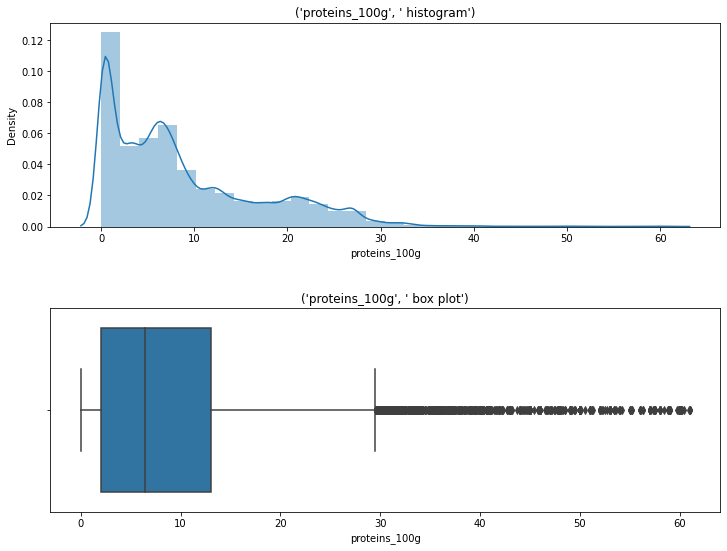

count    206102.000000
mean          8.783777
std           8.350985
min           0.000000
25%           2.000000
50%           6.400000
75%          13.000000
max          61.000000
Name: proteins_100g, dtype: float64
 Skewness empirique:  1.1940418018554364


/Users/david.bellaiche/.pyenv/versions/3.7.5/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/david.bellaiche/.pyenv/versions/3.7.5/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


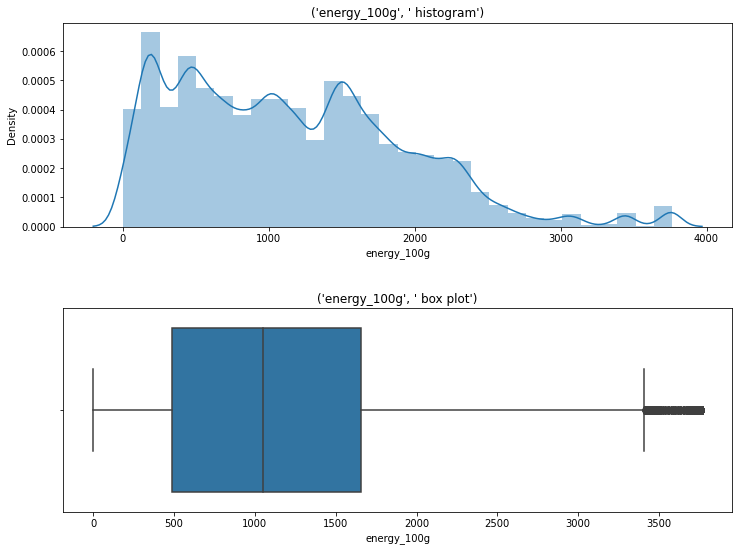

count    206102.000000
mean       1147.628111
std         782.256715
min           0.000000
25%         490.000000
50%        1050.000000
75%        1657.000000
max        3766.000000
Name: energy_100g, dtype: float64
 Skewness empirique:  0.6878989199243364


/Users/david.bellaiche/.pyenv/versions/3.7.5/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/david.bellaiche/.pyenv/versions/3.7.5/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


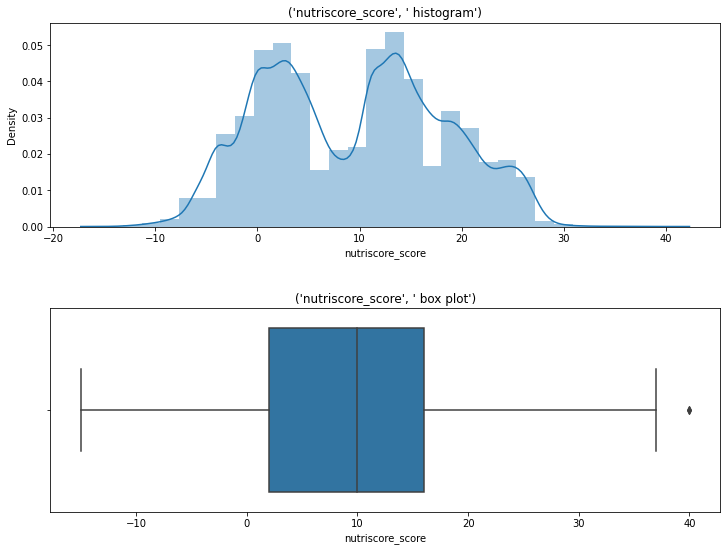

count    206102.000000
mean          9.471999
std           8.768015
min         -15.000000
25%           2.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutriscore_score, dtype: float64
 Skewness empirique:  0.09831820840188292


In [6]:
for ind in univar_indicator:
    univariate_analysis(clean_data, ind, whisker=1.5)

### Proteins:
- unimodal distribution with values from 0 to 61g, a mean of 8.78 and a stdev of 8.35. The median is only 6.4 (75% of values are below 13g). The data is highly skewed on the left (skewness= 1.19). There is a lot of outliers, which shows that some products have an extremely high concentration of proteins.

### Energy (in KJ) 
- bimodal distribution with values from 0 to 3766kJ, a mean of 1147 and a stdev of 782. The median is 1050, which is close to the mean. The distribution is lightly skewed on the left (skewness= 0.687). There are many outliers (close to the whisker though), which may be due to energy bars.

### Nutriscore
- bimodal distribution with values from -15 to 40, a mean of 9.49 and a stdev of 8.77 and 2 modes at around 5 and 15. The median is 10, which is close to the mean. The distribution isn't skewed at all and is highly symetrical and centralized around the mean (skewness= 0.0955). There is only one outliers (close to the whisker though).

# Analyse multivariée

## Analyse de corrélation

### Correlation matrixes

In [7]:
def correlation_matrix(df=clean_data):
    corr = df.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))
    #to get only half of the square

    f, ax = plt.subplots(figsize=(12, 8))

    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=1, center=0,
                square=True, linewidths=.4)

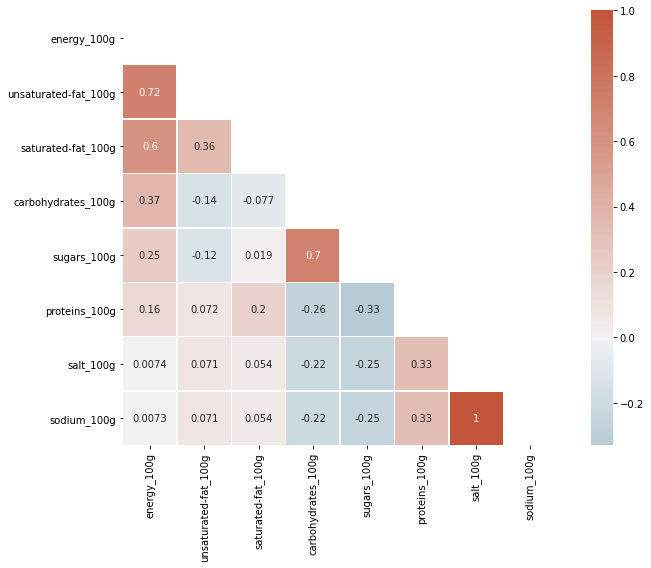

In [8]:
corr_df=clean_data[['energy_100g',
 'unsaturated-fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g', 
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']]
correlation_matrix(corr_df)

### We notive a few highly correlated indicators:
- salt and sodium are 100% proportional (no surprise). We can remove salt.
- sugars and carbohydrates are 71% correlated positively
- energy is higly correlated to fat (66% with unsaturated fat, 57% with saturated fat) and to carbohydrates (42%).
- energy and proteins are not so highly correlated (only 19%)

Let's focus on energy correlations wth fat and carbohydrates



In [9]:
def scatterplot(df, ind1, ind2, ind3=None):
    f, ax=plt.subplots(figsize=(12, 8))
    if ind3 is None:
        data_to_plot=df[[ind1, ind2]]
        indicator_range=None
    else:
        data_to_plot=df[[ind1, ind2, ind3]]
        steps=round((df[ind3].max()-df[ind3].min())/4)
        indicator_range=str(ind3+ " (range)")
        data_to_plot[indicator_range] = pd.cut(df[ind3], np.arange(df[ind3].min(), df[ind3].max()+1, step=steps))
        

    sns.scatterplot(data=data_to_plot, x=ind1, y=ind2, color="#7451ea", hue=indicator_range)
    


/Users/david.bellaiche/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


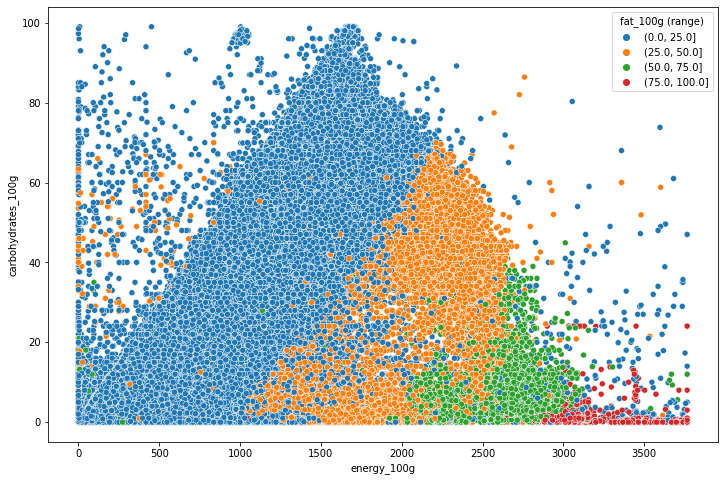

In [10]:
scatterplot(clean_data, "energy_100g", "carbohydrates_100g", "fat_100g")


### We can see here that energy grows with sugars in a proportional way, until sugars reaches it's maximum of 100g for 100g. Then the energy grows with another nutriment: fat. We can deduce there are 2 kinds of products to get high energy: sweat and fat. Fat allows to get more energy than sugar, that has a limit of 100g sugar for around 2000 KJ energy

In [11]:
clean_data.energy_100g.max()

3766.0

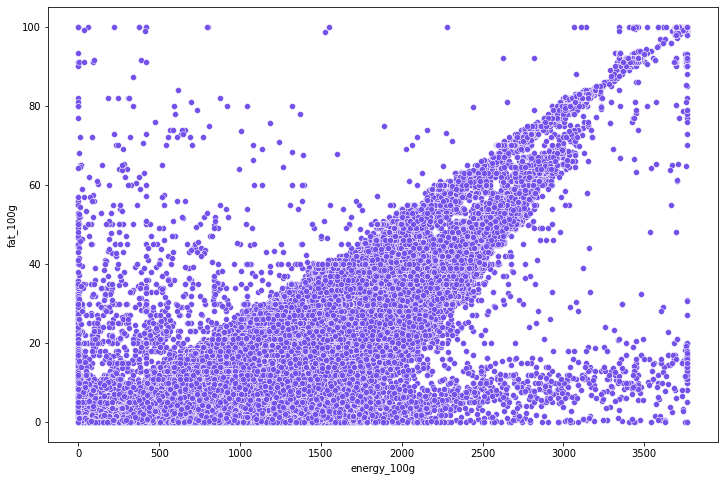

In [12]:
scatterplot(clean_data, "energy_100g", "fat_100g")


#### fat provides 9 calories per gram. So it's expected to have a high distribution at 3766kj (9 * 100 * 4.18 to get Kcal into KJ) of energy for products made of 100% of fat only (like oil).

### Finally, let's check the correlation between energy and nutriscore

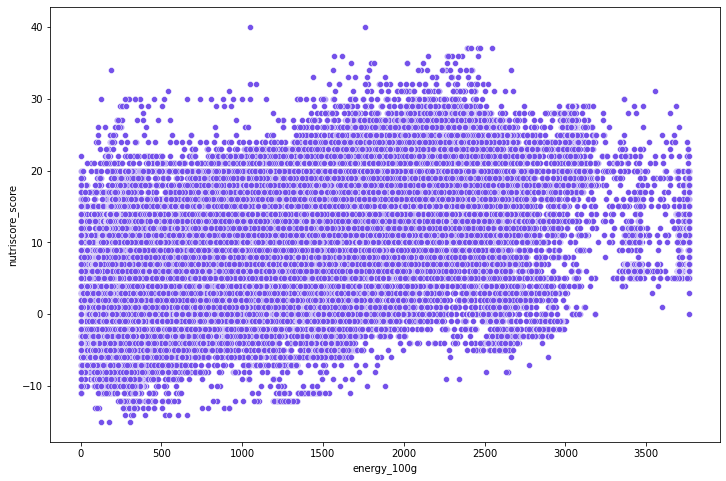

In [13]:
scatterplot(clean_data, "energy_100g", "nutriscore_score")


In [14]:
clean_data[["energy_100g", "nutriscore_score"]].corr()

energy_100g  nutriscore_score
energy_100g          1.000000          0.573217
nutriscore_score     0.573217          1.000000

### Finally, we can see that the nutriscore grows with energy (57% correlation). The more energy there is, the worst it is for health. So the goal will be to find the right balance between energy and health for our sport app.

### We'll combine important nutriments to get our nutrisport, even though these nutriment might already be taken into account in the nutriscore formula (it will increase their weight in the score calculation)

## ACP

In [15]:
from sklearn import decomposition
from sklearn import preprocessing
#from functions import *

# choix du nombre de composantes à calculer
n_comp = 6

# selection des colonnes à prendre en compte dans l'ACP
data_pca = clean_data[['energy_100g',
 'fat_100g',
 'unsaturated-fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g', 
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']]

X = data_pca.values
names = clean_data["code"] #???
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)


# Projection des individus
X_projected = pca.transform(X_scaled)

plt.show()



In [16]:
pca.components_

array([[ 0.45520493,  0.53349068,  0.47071347,  0.40534296, -0.09190097,
        -0.09344852,  0.20209624,  0.17928615,  0.17926867],
       [-0.29450102, -0.13394547, -0.11180722, -0.11292295, -0.40935726,
        -0.42613231,  0.2933527 ,  0.46629404,  0.46629096],
       [ 0.18434552, -0.13322685, -0.15366809, -0.03805712,  0.53031625,
         0.46991535,  0.01523944,  0.45874797,  0.45876727],
       [-0.08310289,  0.14360494,  0.38722384, -0.34651127, -0.10715684,
        -0.0381652 , -0.78918938,  0.18261627,  0.18262373],
       [-0.19606908,  0.03164475, -0.38252068,  0.7418694 , -0.22845649,
         0.13396385, -0.4249022 ,  0.08119052,  0.08118361],
       [-0.2217144 ,  0.08557354,  0.18890419, -0.13330876, -0.52154926,
         0.75413037,  0.22198988, -0.00540082, -0.00538144]])

### Correlation circle

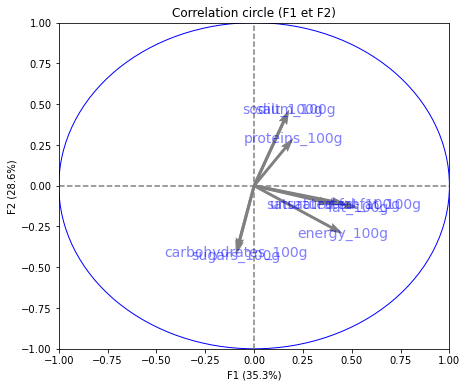

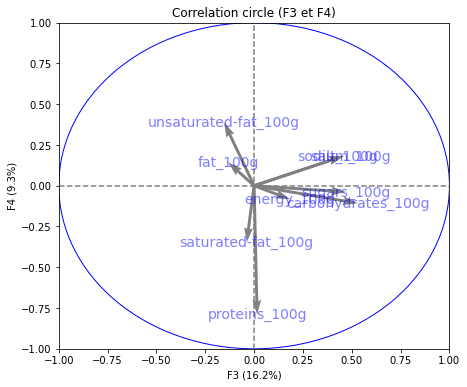

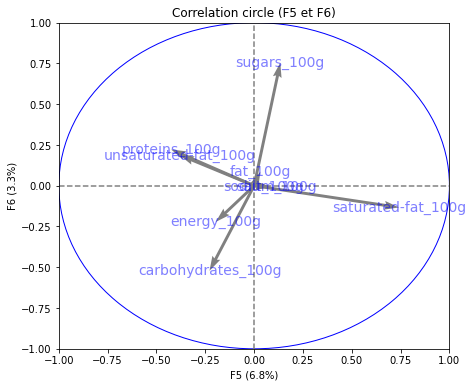

In [17]:
from matplotlib.collections import LineCollection


#Taken from openclassrooms course, as scikit learn doesn't provide a correlation circle function
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation circle (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels=data_pca.columns)


In [18]:
pca_df=pd.DataFrame(data=pcs, columns=features)


In [19]:
pca_to_plot=pca_df.T

In [20]:
np.array(pca.explained_variance_ratio_*100).cumsum()
# with 3 components, we capture  83% of variance
# with 2 components, we capture  60% of variance

array([35.30000438, 63.87230929, 80.06479978, 89.39020605, 96.17015037,
       99.51664053])

In [21]:
import plotly.graph_objects as go

categories=pca_to_plot.index

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=pca_to_plot[0].tolist(),
      theta=categories,
      fill='toself',
      name='Componant#1'
))
fig.add_trace(go.Scatterpolar(
      r=pca_to_plot[1].tolist(),
      theta=categories,
      fill='toself',
      name='Componant#2'
))

fig.add_trace(go.Scatterpolar(
      r=pca_to_plot[2].tolist(),
      theta=categories,
      fill='toself',
      name='Componant#3'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-1, 1]
    )),
  showlegend=False
)

fig.show()

### We can define componants as follow:
- Componant#1: fat
- Componant#2: proteins
- Componant#3: sugar

In [22]:
df_from_pca=pd.DataFrame(data=X_projected)
df_from_pca_cleaned=df_from_pca.rename(columns={0:"Fat", 1:"Proteins", 2:"Sugar"})[["Fat", "Proteins","Sugar"]]


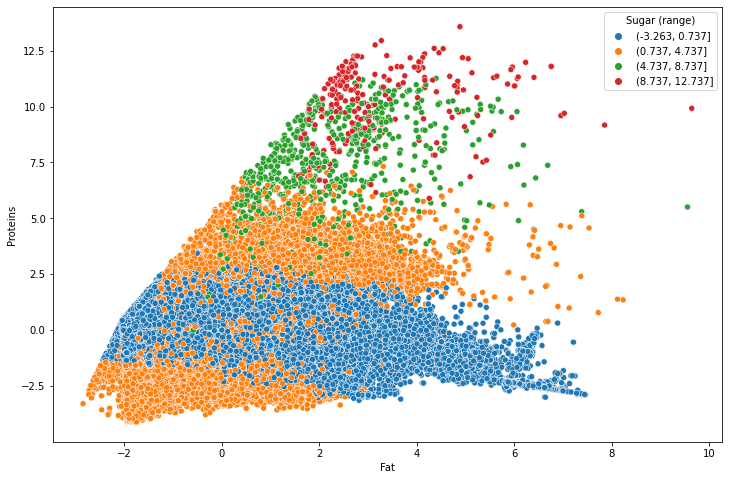

In [23]:
scatterplot(df_from_pca_cleaned, "Fat", "Proteins", "Sugar")



#### We identify 3 groups (cf ppt)

# Let's create our score

In [24]:
data_for_score = clean_data[[
 'energy_100g',
 'fat_100g',
 'unsaturated-fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g', 
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 "nutriscore_score"]] #we added nutriscore vs pca


In [25]:
def normalize_data(df):
    return (df - df.min()) / (df.max() - df.min())

In [26]:
normalized_data=normalize_data(data_for_score)

In [27]:
normalized_data["nutrisport_score"]=(normalized_data["energy_100g"]\
                        + normalized_data["unsaturated-fat_100g"] \
                        - normalized_data["saturated-fat_100g"]/2 \
                        + normalized_data["carbohydrates_100g"]\
                        - normalized_data["sugars_100g"] /2\

                        + normalized_data["proteins_100g"] *2 \
                        - normalized_data["nutriscore_score"]\
                                  
                        - normalized_data["sodium_100g"]\
                                 )


### Adding score to the original dataset

In [28]:
clean_data["nutrisport_score"]=normalized_data["nutrisport_score"]

In [29]:
clean_data[clean_data.nutrisport_score > clean_data.nutrisport_score.quantile(0.95)].sort_values("nutrisport_score")

code                                    product_name  \
189876  7640161875890  Holle Crunchy Snack Hirse Mango, 25 GR Packung   
76284   3263820003003                              Pois Cassés Jaunes   
203646  8718734490142                                      Chocopasta   
89339   3276650111022                                   Mais Pop Corn   
193417  8009167218206                          Linguine Tartufo 250gr   
...               ...                                             ...   
168393  3770000298147                          Micro Algues Spiruline   
185381  6091403671625                           Spiruline Homeopharma   
12955   2000000041639     Bulk Powders Nuts About Whey Chocolat Blanc   
177766  5055950600096               Nuts about whey chocolate cookies   
161173  3760115094024                                 Spiruline Tonic   

                      brands_tags  \
189876                      holle   
76284               le-bon-semeur   
203646                        NaN   
89339                  haudecoeur   
193417                        NaN   
...                           ...   
168393                    ma-diet   
185381                        NaN   
12955                bulk-powders   
177766  bulk-powders,active-foods   
161173                   meltonic   

                                          categories_tags  \
189876                          en:snacks,en:sweet-snacks   
76284   en:plant-based-foods-and-beverages,en:plant-ba...   
203646  en:spreads,en:breakfasts,en:sweet-spreads,fr:p...   
89339                               fr:mais-pour-pop-corn   
193417  en:plant-based-foods-and-beverages,en:plant-ba...   
...                                                   ...   
168393                en:dietary-supplements,en:spirulina   
185381                en:dietary-supplements,en:spirulina   
12955   en:plant-based-foods-and-beverages,en:plant-ba...   
177766  en:plant-based-foods-and-beverages,en:plant-ba...   
161173                en:dietary-supplements,en:spirulina   

                                              labels_tags  nutriscore_score  \
189876        en:organic,en:gluten-free,en:no-added-sugar               1.0   
76284                                                 NaN               0.0   
203646                                                NaN              20.0   
89339                                                 NaN              -6.0   
193417                                                NaN               1.0   
...                                                   ...               ...   
168393  en:organic,en:vegetarian,en:eu-organic,en:vega...              -4.0   
185381                                                NaN              -1.0   
12955                                                 NaN               0.0   
177766                                                NaN               0.0   
161173                                         en:organic              -1.0   

                   main_category_en  energy_100g  fat_100g  \
189876                 Sweet snacks       1741.0     11.00   
76284                fr:pois-casses       1427.0      1.16   
203646  Cocoa and hazelnuts spreads       2297.0     39.10   
89339         fr:mais-pour-pop-corn       1477.0      4.30   
193417                     Linguine       1515.0      2.70   
...                             ...          ...       ...   
168393                    Spirulina       1628.0      7.70   
185381                    Spirulina       1498.0      6.00   
12955                Peanut butters       2226.0     35.00   
177766               Peanut butters       2226.0     35.00   
161173                    Spirulina       1598.0      6.00   

        saturated-fat_100g  carbohydrates_100g  sugars_100g  proteins_100g  \
189876                1.10               69.00         2.50           8.80   
76284                 0.16               34.87         8.00          24.55   
203646                4.60        

In [30]:
clean_data["product_with_code"] = (clean_data["product_name"]) + " (" + (clean_data["code"]).astype(str) + ")"

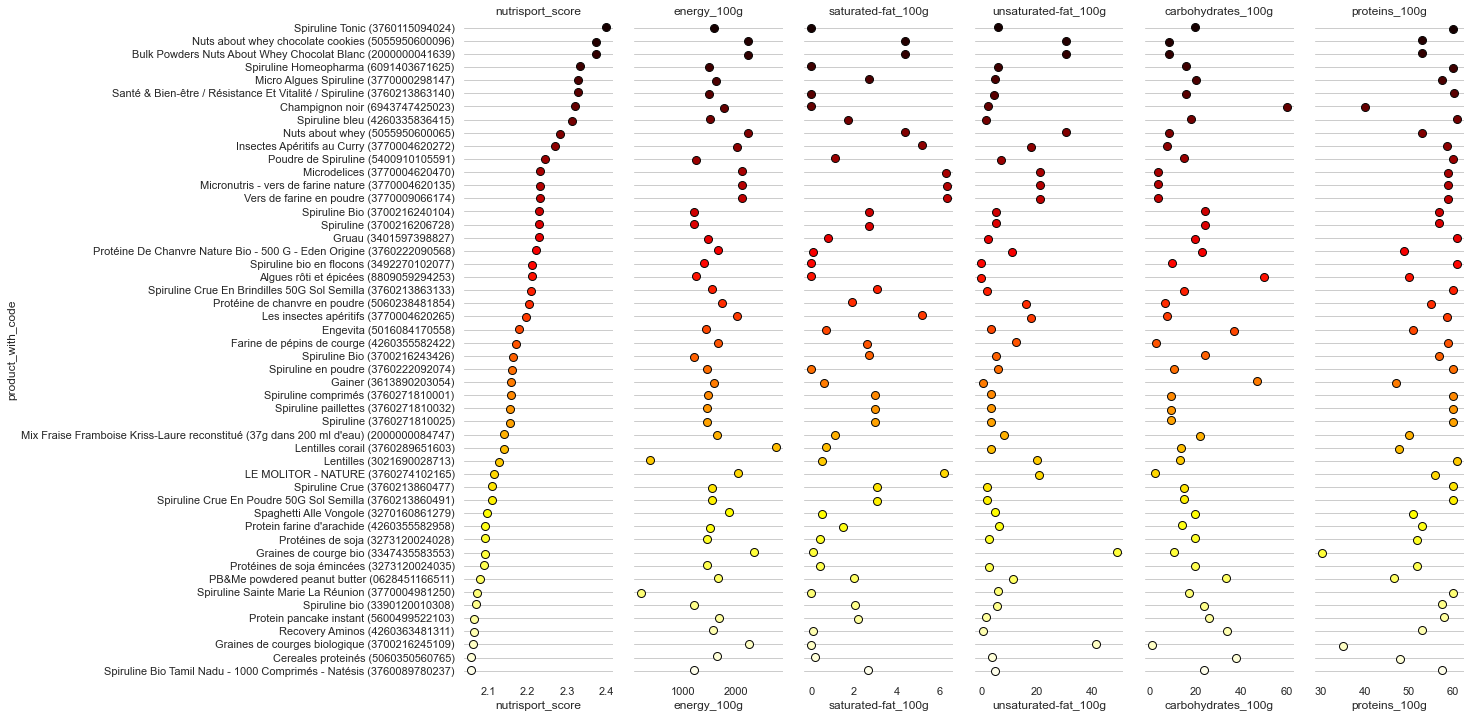

In [31]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the dataset
data_to_plot=clean_data[["product_with_code","nutrisport_score", "energy_100g", "saturated-fat_100g", \
                         "unsaturated-fat_100g", "carbohydrates_100g", "proteins_100g"]]\
                        .sort_values("nutrisport_score", ascending=False).iloc[0:50] #top 50 products


# Make the PairGrid
g = sns.PairGrid(data_to_plot.sort_values("nutrisport_score", ascending=False),
                 x_vars=data_to_plot.columns[1:], y_vars="product_with_code",
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=8, orient="h", linewidth=1, palette="hot")#,

titles=data_to_plot.columns[1:]
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [32]:
clean_data.nutrisport_score.describe()

count    206102.000000
mean          0.321503
std           0.447894
min          -1.525402
25%          -0.005956
50%           0.287669
75%           0.556809
max           2.399011
Name: nutrisport_score, dtype: float64

In [33]:
clean_data[clean_data.nutrisport_score==clean_data.nutrisport_score.max()]

code     product_name brands_tags  \
161173  3760115094024  Spiruline Tonic    meltonic   

                            categories_tags labels_tags  nutriscore_score  \
161173  en:dietary-supplements,en:spirulina  en:organic              -1.0   

       main_category_en  energy_100g  fat_100g  saturated-fat_100g  \
161173        Spirulina       1598.0       6.0                 0.0   

        carbohydrates_100g  sugars_100g  proteins_100g  salt_100g  \
161173                20.0          0.0           60.0        0.0   

        sodium_100g  unsaturated-fat_100g  nutrisport_score  \
161173          0.0                   6.0          2.399011   

                      product_with_code  
161173  Spiruline Tonic (3760115094024)

## Get the nutrisport grade

In [34]:
clean_data['nutrisport_score_normalized']=normalize_data(clean_data[['nutrisport_score']])

/Users/david.bellaiche/.pyenv/versions/3.7.5/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:title={'center':'Nutrisport Distribution'}, xlabel='nutrisport_score_normalized', ylabel='Density'>

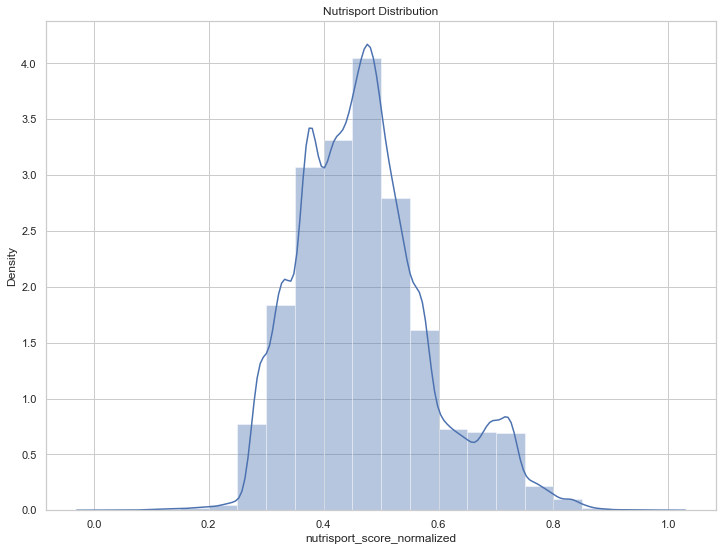

In [35]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.set_title("Nutrisport Distribution")
sns.distplot(clean_data['nutrisport_score_normalized'], bins=20)

In [36]:
clean_data['nutrisport_grade']=np.where(clean_data.nutrisport_score_normalized > 0.70, "A",\
        (np.where(clean_data.nutrisport_score_normalized > 0.60, "B",\
        ((np.where(clean_data.nutrisport_score_normalized > 0.50, "C",\
        ((np.where(clean_data.nutrisport_score_normalized > 0.45, "D",\
        ((np.where(clean_data.nutrisport_score_normalized > 0.35, "E",\
        "F"))))))))))))

In [37]:
nutrisport_count=clean_data.groupby('nutrisport_grade', as_index=False).code.count()

Text(0.5, 1.0, 'Nutrisport Grade')

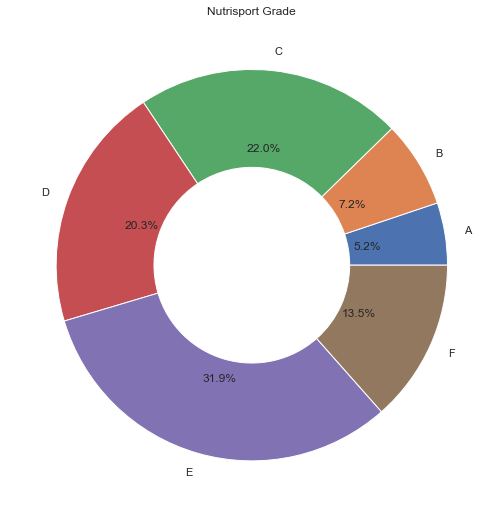

In [38]:
fig, ax= plt.subplots(figsize=(12, 9))
plt.pie(nutrisport_count.code, labels=nutrisport_count["nutrisport_grade"],\
        wedgeprops=dict(width=0.5), autopct='%1.1f%%')
ax.set_title("Nutrisport Grade")

## Our application

In [39]:
def scan(code="3760199620201"):
    category_scanned=clean_data[clean_data["code"]==code]['categories_tags'].values[0]
    print("Categories: ", category_scanned)
    print(clean_data[clean_data["code"]==code].product_name)
    print(clean_data[clean_data["code"]==code].nutrisport_grade)

    #get top product
    top_5_products=clean_data[clean_data["categories_tags"].str.contains(category_scanned)]\
    .sort_values("nutrisport_score", ascending=False).iloc[0:5]
    
    return top_5_products

In [40]:
def scan_further(code="3760199620201", loop=1):
    category_scanned=clean_data[clean_data["code"]==code]['categories_tags'].values[0]
    
    print(clean_data[clean_data["code"]==code].product_name)
    
    #remove last category, can be played several times (add limit)
    for i in range(loop):
        category_scanned_list=category_scanned.split(",")
        category_scanned_list.pop() #removing last category
        category_scanned=','.join(category_scanned_list) #new
    print("Categories: ", category_scanned)
    #get top product
    top_5_products=clean_data[clean_data["categories_tags"].str.contains(category_scanned)]\
    .sort_values("nutrisport_score", ascending=False).iloc[0:5]
    
    return top_5_products



##### possibility to add labels_tags.str.contains(pat="organic|gluten-free") to get filters in our app.


In [41]:
scan(code="8002352302001")

Categories:  en:plant-based-foods-and-beverages,en:plant-based-foods,en:spreads,en:nuts-and-their-products,en:plant-based-spreads,en:oilseed-purees,en:nut-butters,en:almond-butters,en:whole-almond-purees
191521    Amandino
Name: product_name, dtype: object
191521    A
Name: nutrisport_grade, dtype: object


code                     product_name  brands_tags  \
159783  3760091727749  Puree D'amande Complete Tunisie   ethiquable   
149008  3700036900363        Purée d'amandes complètes    naturalia   
149128  3700036906082        Purée d'amandes complètes    naturalia   
110296  3396410047962        Purée D'amandes Complètes  bonne-terre   
109465  3390390001600          Purée d'amande complète       ti-bio   

                                          categories_tags  \
159783  en:plant-based-foods-and-beverages,en:plant-ba...   
149008  en:plant-based-foods-and-beverages,en:plant-ba...   
149128  en:plant-based-foods-and-beverages,en:plant-ba...   
110296  en:plant-based-foods-and-beverages,en:plant-ba...   
109465  en:plant-based-foods-and-beverages,en:plant-ba...   

                                              labels_tags  nutriscore_score  \
159783  en:organic,en:eu-organic,en:ab-agriculture-bio...              -4.0   
149008  en:organic,en:eu-organic,en:green-dot,fr:ab-ag...              -4.0   
149128  en:organic,en:eu-organic,fr:ab-agriculture-bio...              -4.0   
110296  en:organic,en:eu-organic,fr:ab-agriculture-bio...               7.0   
109465                           en:organic,en:eu-organic              -2.0   

           main_category_en  energy_100g  fat_100g  saturated-fat_100g  \
159783  Whole almond purees       2653.0      55.0                 4.5   
149008  Whole almond purees       2648.0      54.0                 4.6   
149128  Whole almond purees       2620.0      54.0                 4.6   
110296  Whole almond purees       2711.0      54.0                 4.4   
109465  Whole almond purees       2782.0      58.3                 4.9   

        carbohydrates_100g  sugars_100g  proteins_100g  salt_100g  \
159783                 4.8          4.3           29.0       0.02   
149008                 8.5          2.0           25.0       0.00   
149128                 8.5          2.0           25.0       0.01   
110296                12.1          4.1           28.4       0.01   
109465                 5.1          4.7           21.8       0.02   

        sodium_100g  unsaturated-fat_100g  nutrisport_score  \
159783        0.008                  50.5          1.948216   
149008        0.000                  49.4          1.854127   
149128        0.004                  49.4          1.846136   
110296        0.004                  49.6          1.811091   
109465        0.008                  53.4          1.736696   

                                      product_with_code  \
159783  Puree D'amande Complete Tunisie (3760091727749)   
149008        Purée d'amandes complètes (3700036900363)   
149128        Purée d'amandes complètes (3700036906082)   
110296        Purée D'amandes Complètes (3396410047962)   
109465          Purée d'amande complète (3390390001600)   

        nutrisport_score_normalized nutrisport_grade  
159783                     0.885131                A  
149008                     0.861155                A  
149128                     0.859119                A  
110296                     0.850189                A  
109465                     0.831232                A

In [42]:
scan_further(code="3760199620201", loop=4)

165406    Mangue Alphonso
Name: product_name, dtype: object
Categories:  en:plant-based-foods-and-beverages,en:beverages,en:plant-based-beverages


code                  product_name           brands_tags  \
195150       80354789                   Jus dananas                 zuegg   
164231  3760172130017                  Jus de pomme        ferme-des-noes   
72709   3258260020178          Lait d'Amande et Riz               supplex   
154381  3760002691237                Jus de carotte  jean-louis-bissardon   
2231      94922198068  Jus d'orange frais sur place                   NaN   

                                          categories_tags  \
195150  en:plant-based-foods-and-beverages,en:beverage...   
164231  en:plant-based-foods-and-beverages,en:beverage...   
72709   en:plant-based-foods-and-beverages,en:beverage...   
154381  en:plant-based-foods-and-beverages,en:beverage...   
2231    en:plant-based-foods-and-beverages,en:beverage...   

                                         labels_tags  nutriscore_score  \
195150                              en:made-in-italy              -7.0   
164231                                           NaN              -5.0   
72709   en:gluten-free,en:high-in-calcium,en:no-milk              -2.0   
154381                                           NaN             -10.0   
2231                                             NaN              -2.0   

             main_category_en  energy_100g  fat_100g  saturated-fat_100g  \
195150           Fruit juices         38.0       0.0                 0.0   
164231  Squeezed apple juices         13.0      10.0                 1.0   
72709             Plant milks       1590.0       6.0                 0.9   
154381          Carrot juices          0.0       0.6                 0.0   
2231            Orange juices        209.0       0.1                 0.1   

        carbohydrates_100g  sugars_100g  proteins_100g  salt_100g  \
195150                10.0          9.0           41.0       0.00   
164231                 6.8          6.5           42.0       1.00   
72709                 63.0         21.0           14.0       0.16   
154381                 8.0          6.1           32.0       0.05   
2231                  10.0          8.0           24.0       0.10   

        sodium_100g  unsaturated-fat_100g  nutrisport_score  \
195150        0.000                   0.0          1.263990   
164231        0.400                   9.0          1.260318   
72709         0.064                   5.1          1.208683   
154381        0.020                   0.6          1.011179   
2231          0.040                   0.0          0.659823   

                                 product_with_code  \
195150                      Jus dananas (80354789)   
164231                Jus de pomme (3760172130017)   
72709         Lait d'Amande et Riz (3258260020178)   
154381              Jus de carotte (3760002691237)   
2231    Jus d'orange frais sur place (94922198068)   

        nutrisport_score_normalized nutrisport_grade  
195150                     0.710779                A  
164231                     0.709844                A  
72709                      0.696686                B  
154381                     0.646359                B  
2231                       0.556829                C